MEDICAL INSURANCE COST PREDICTION MODEL

In [1]:
# IMPORTING THE dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

DATA COLLECTION & ANALYSIS

In [2]:
#LOADING THE DATA
dataset = pd.read_csv("6_insurance.csv")

In [3]:
# PRINT FRIST FIVE ROWS OF THE DATASET 
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.shape

(1338, 7)

In [ ]:
#get information about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical Data

--> sex

--> smoker

--> region

In [ ]:
# finding the null values of the dataset 
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

data analysis

In [7]:
#statistical measures of the dataset

dataset.describe() 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# number of rows and columns of the dataset
dataset.shape

(1338, 7)

C:\Users\avita\AppData\Local\Temp\ipykernel_2996\1378531688.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'])


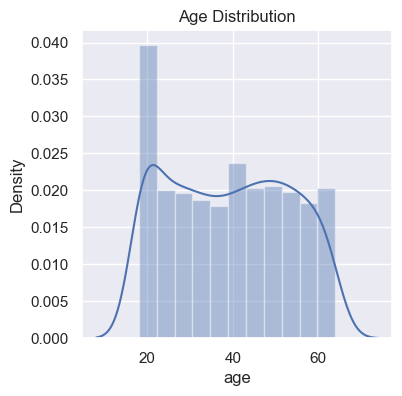

In [9]:
#distribution at the age values
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(dataset['age'])
plt.title('Age Distribution')
plt.show()

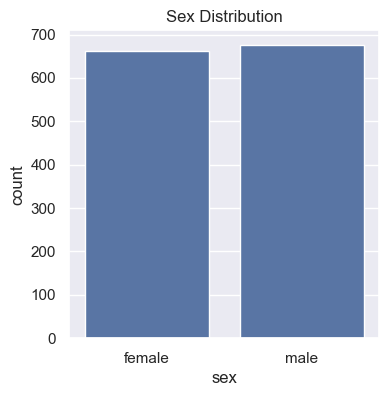

In [10]:
#gender column
plt.figure(figsize=(4, 4))
sns.countplot(x = 'sex', data= dataset)
plt.title('Sex Distribution')
plt.show()

C:\Users\avita\AppData\Local\Temp\ipykernel_2996\3502308633.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['bmi'])


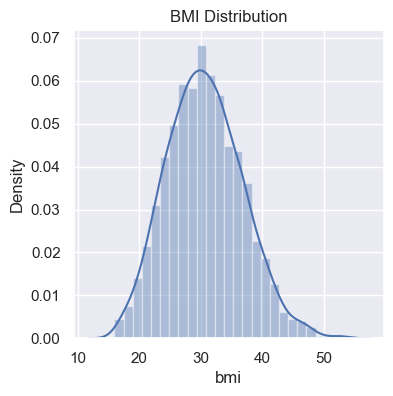

In [11]:
#distribution at the bmi values
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

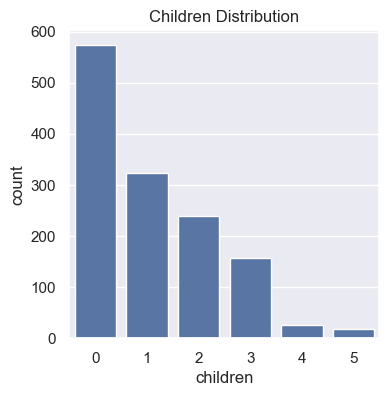

In [12]:
#children column
plt.figure(figsize=(4,4))
sns.countplot(x = 'children', data= dataset)
plt.title('Children Distribution')
plt.show()

In [13]:
dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

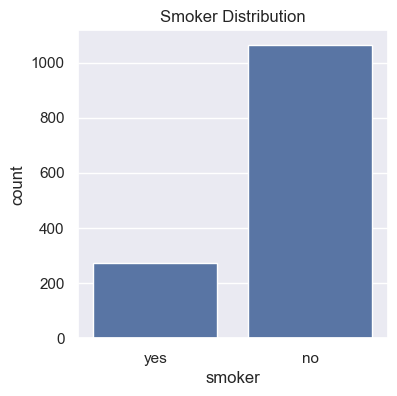

In [14]:
#children column
plt.figure(figsize=(4,4))
sns.countplot(x = 'smoker', data= dataset)
plt.title('Smoker Distribution')
plt.show()

In [15]:
dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

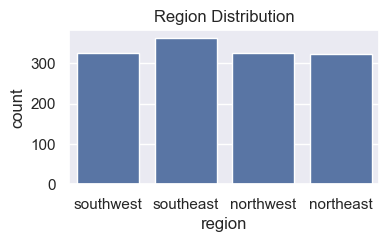

In [16]:
#Region column
plt.figure(figsize=(4,2))
sns.countplot(x = 'region', data= dataset)
plt.title('Region Distribution')
plt.show()

C:\Users\avita\AppData\Local\Temp\ipykernel_2996\2363848971.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['charges'])


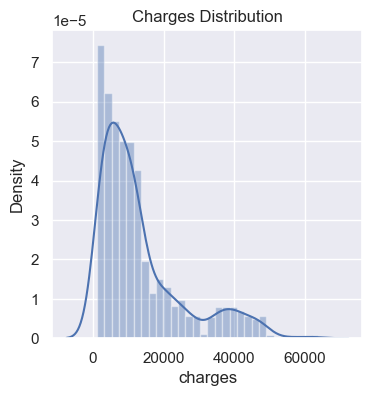

In [17]:
#distribution at the age values
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre Processing

Encoding the categorical features

In [18]:
# Encoding sex column
dataset.replace({'sex': {'male':0, 'female': 1}}, inplace = True)


# encoding the smoker column
dataset.replace({'smoker': {'yes':0, 'no': 1}}, inplace = True)

#encoding the region column
dataset.replace({'region': {'southeast':0, 'southwest': 1, 'northeast': 2, 'northwest':3}}, inplace = True)

C:\Users\avita\AppData\Local\Temp\ipykernel_2996\2473322241.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'sex': {'male':0, 'female': 1}}, inplace = True)
C:\Users\avita\AppData\Local\Temp\ipykernel_2996\2473322241.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'smoker': {'yes':0, 'no': 1}}, inplace = True)
C:\Users\avita\AppData\Local\Temp\ipykernel_2996\2473322241.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

In [19]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [20]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting the feature and Target

In [21]:
X = dataset.drop(columns= 'charges', axis =1)

In [22]:
Y = dataset['charges']

splitting tha data into training and testing data

In [23]:
X_train , X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [27]:
# prediction on training data 
training_data_prediction = model.predict(X_train)

In [28]:
#R squared Value
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R squared value : ', r2_train)

R squared value :  0.751505643411174


In [29]:
testing_data_prediction = model.predict(X_test)

In [30]:
#R squared Value
r2_test = metrics.r2_score(Y_train,training_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.751505643411174


Building the predictive model

In [31]:
input_data = (18,	0,	33.770,	1,	1, 0)

# changing the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
 
prediction = model.predict(input_data_reshaped)
print(prediction)

print("The Medical insurance Cost is USD", prediction[0])

[3701.06157802]
The Medical insurance Cost is USD 3701.061578023093


c:\Users\avita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
